Notebook author: Özgün Haznedar

The purpose of this notebook is to visualise model predictions for a sample image side-by-side, comparing to high-resolution ground truth and low-resolution baseline. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# if using local repo of ISR
%%capture
%cd /content/drive/MyDrive/image-super-resolution
!python setup.py install
# else use !pip install ISR and see ISR_module_adjustments notebook for changes
# to run locally

In [ ]:
import matplotlib.pyplot as plt
import imageio
import cv2
from ISR.models import RDN, RRDN

In [ ]:
# MODELS 
rrdn      = RRDN(arch_params={'C': 4, 'D':3, 'G':64, 'G0':64, 'T':10, 'x':3}) 
rdn_small = RDN(arch_params={'C': 3, 'D':10, 'G':64, 'G0':64, 'x':3}) 
rdn_large = RDN(arch_params={'C': 6, 'D':20, 'G':64, 'G0':64, 'x':3}) 

In [ ]:
# WEIGHTS DIRECTORY:
# {"model name" : [model, weight]}

weights_dir = {"model name here"                       :[rrdn      , "PATH TO WEIGHTS HDF5 file"] ,
               "model name here"                      :[rdn_small      , "PATH TO WEIGHTS HDF5 file"]}

In [ ]:
# LIST OF LIST OF SAMPLE IMAGES 
# [landsat (LR) file, sentinel (HR) file]
sample_images = [
                 [ "PATH TO LOW RESOLUTION FILE" 
                 ,"PATH TO HIGH RESOLUTION FILE" ],
                 ]
              

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


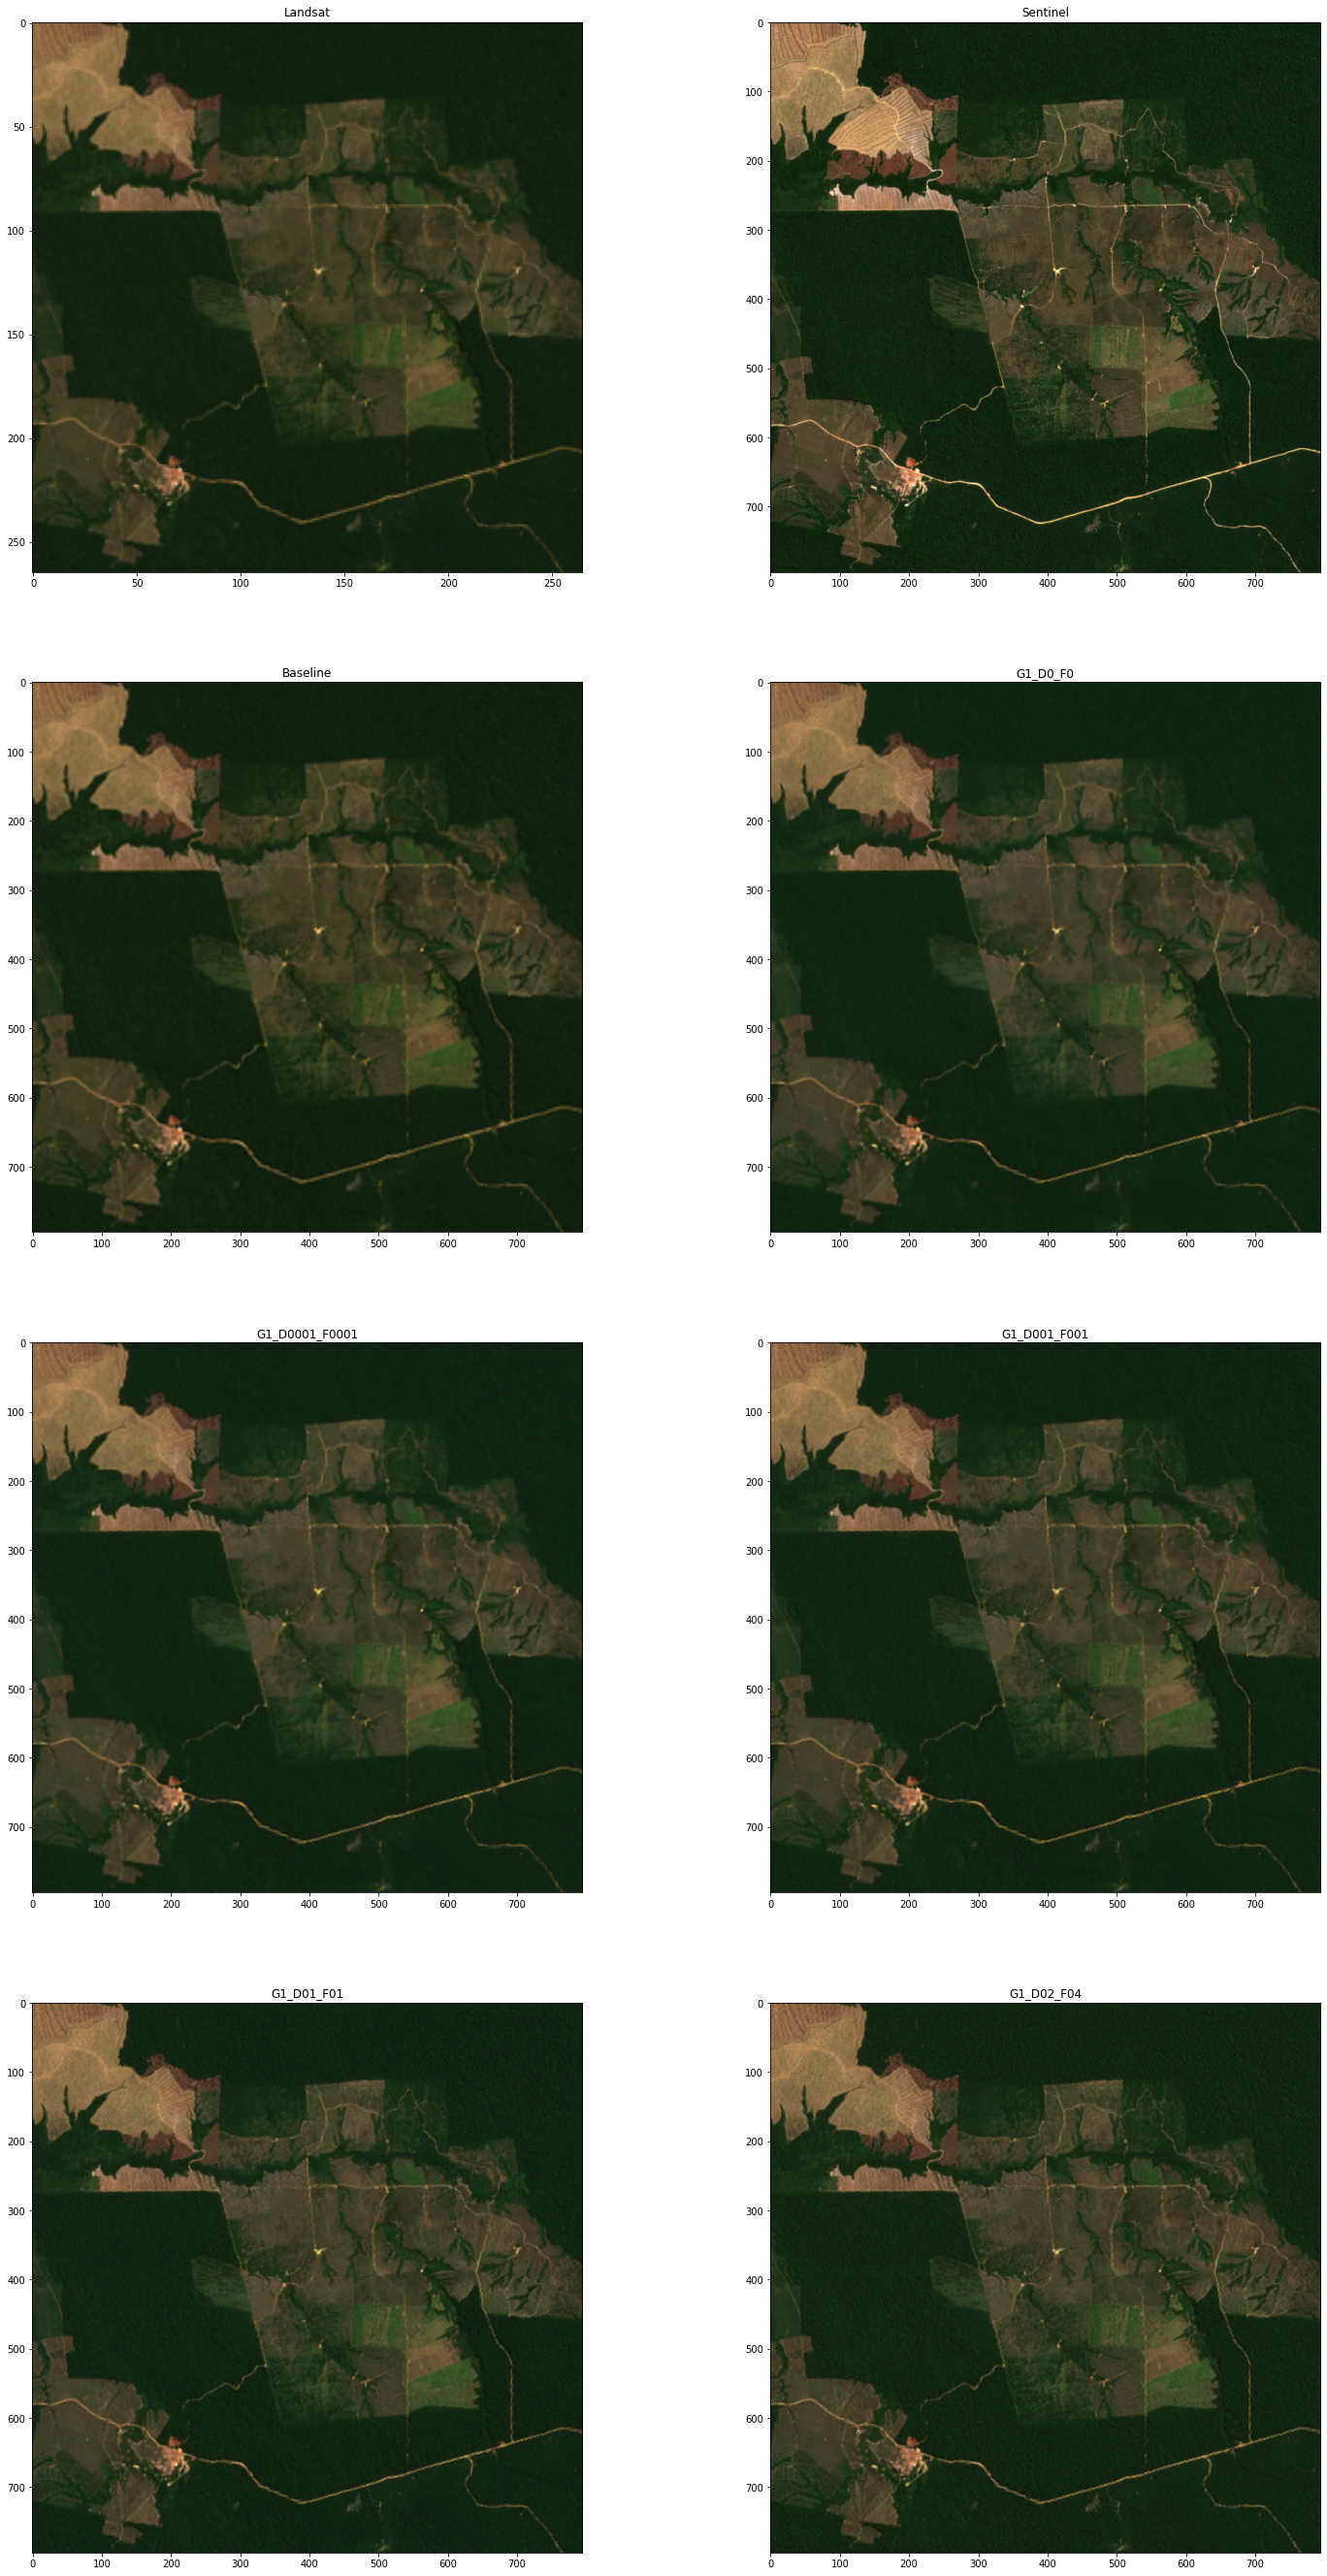

In [ ]:
for idx, [X , Y] in enumerate(sample_images) :
  X_arr = imageio.imread(X)
  Y_arr = imageio.imread(Y)
  fig, ax = plt.subplots(len(weights_dir)+3)//2+1,2, figsize=(25,8*(len(weights_dir)+1)))
  ax[0,0].imshow(X_arr)
  ax[0,0].set_title( f"Landsat" )
  ax[0,1].imshow(Y_arr)
  ax[0,1].set_title( f"Sentinel" )
  baseline = cv2.resize(X_arr.astype('float32'), (X_arr.shape[0]*3, X_arr.shape[0]*3), interpolation= cv2.INTER_CUBIC)
  ax[1,0].imshow(baseline.astype('int'))
  ax[1,0].set_title( f"Baseline" )
  for idx2 ,( model_name, [model,weight]) in enumerate(weights_dir.items()):
    model.model.load_weights(weight)
    sr_img = model.predict(X_arr)
    ax[(idx2+1)//2+1,(idx2+1)%2].imshow(sr_img)
    ax[(idx2+1)//2+1,(idx2+1)%2].set_title( f"{model_name}" )
  plt.savefig('PATH FOR SAVING IMAGE .png')